<a href="https://colab.research.google.com/github/pallevenivarshini-cyber/Gold_silver_prediction.gt/blob/main/Gold_Silver_Quant_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance pandas_datareader xgboost

In [ ]:
# ==========================================================
# INDIA + GLOBAL GOLD–SILVER MACRO DATA COLLECTION
# ==========================================================

import yfinance as yf
import pandas as pd
import datetime
import os
import time
from pandas_datareader import data as pdr


# ------------------------------
# 1️⃣ DATE RANGE
# ------------------------------
START_DATE = "2005-01-01"
END_DATE = datetime.datetime.today()


# ------------------------------
# 2️⃣ CREATE FOLDER STRUCTURE
# ------------------------------
# ------------------------------
# 2️⃣ GOOGLE DRIVE FOLDER STRUCTURE
# ------------------------------
BASE_PATH = "/content/drive/MyDrive/Gold_Silver_Project"
INDIA_PATH = BASE_PATH + "/india_data"
GLOBAL_PATH = BASE_PATH + "/global_data"

os.makedirs(INDIA_PATH, exist_ok=True)
os.makedirs(GLOBAL_PATH, exist_ok=True)

# ==========================================================
# 3️⃣ YAHOO DOWNLOAD FUNCTION
# ==========================================================

def download_yahoo(ticker, name, save_path):
    try:
        df = yf.download(
            ticker,
            start=START_DATE,
            end=END_DATE,
            auto_adjust=False,
            progress=False
        )

        if df.empty:
            print(f"{name} not available.")
            return

        if "Adj Close" in df.columns:
            df = df[["Adj Close"]].rename(columns={"Adj Close": name})
        else:
            df = df[["Close"]].rename(columns={"Close": name})

        df.reset_index(inplace=True)
        df.to_csv(os.path.join(save_path, f"{name}.csv"), index=False)

        print(f"Saved: {name}")

    except Exception as e:
        print(f"Error downloading {name}: {e}")


# ==========================================================
# 4️⃣ GLOBAL MARKET DATA (Yahoo)
# ==========================================================

global_tickers = {
    # Precious Metals Futures
    "Gold_Futures": "GC=F",
    "Silver_Futures": "SI=F",

    # USD & FX
    "DXY": "DX-Y.NYB",
    "EURUSD": "EURUSD=X",
    "USDJPY": "JPY=X",

    # Risk & Equities
    "SP500": "^GSPC",
    "VIX": "^VIX",

    # Commodities
    "Copper": "HG=F",
    "Oil": "CL=F",

    # Volatility Structure Proxy
    "VIX3M": "^VIX3M"
}

print("\nDownloading GLOBAL market data...\n")

for name, ticker in global_tickers.items():
    download_yahoo(ticker, name, GLOBAL_PATH)
    time.sleep(0.3)


# ==========================================================
# 5️⃣ INDIA MARKET DATA (Yahoo)
# ==========================================================

india_tickers = {
    "Gold_India_ETF": "GOLDBEES.NS",
    "Silver_India_ETF": "SILVERBEES.NS",
    "USDINR": "USDINR=X",
    "NIFTY50": "^NSEI",
    "India_VIX": "^INDIAVIX",

    # Banking & Financial Stress Proxy
    "BANKNIFTY": "^NSEBANK",

    # Oil (India imports heavy oil → affects INR & inflation)
    "Brent_Oil": "BZ=F"
}

print("\nDownloading INDIA market data...\n")

for name, ticker in india_tickers.items():
    download_yahoo(ticker, name, INDIA_PATH)
    time.sleep(0.3)


# ==========================================================
# 6️⃣ FRED MACRO DATA
# ==========================================================

def download_fred(series_code, name, save_path):
    try:
        df = pdr.DataReader(series_code, "fred", START_DATE, END_DATE)

        if df.empty:
            print(f"{name} not available from FRED.")
            return

        df.reset_index(inplace=True)
        df.rename(columns={series_code: name}, inplace=True)
        df.to_csv(os.path.join(save_path, f"{name}.csv"), index=False)

        print(f"Saved: {name}")

    except Exception as e:
        print(f"Error downloading {name} from FRED")


fred_series = {
    # ------------------
    # US Real Rate Drivers
    # ------------------
    "US_Real_Yield_10Y": "DFII10",
    "US_10Y_Yield": "DGS10",
    "US_2Y_Yield": "DGS2",

    # Inflation Expectations
    "US_Breakeven_10Y": "T10YIE",
    "US_Breakeven_5Y": "T5YIE",
    "US_CPI": "CPIAUCSL",

    # Liquidity
    "US_M2": "M2SL",

    # Growth
    "US_Industrial_Production": "INDPRO",

    # ------------------
    # INDIA MACRO
    # ------------------
    # -----------------------
    # 🟡 Inflation
    # -----------------------
    "India_CPI_All": "INDCPIALLMINMEI",

    # -----------------------
    # 🟡 Interest Rates
    # -----------------------
    "India_Policy_Rate": "INTDSRINM193N",
    "India_10Y_Yield": "INDIRLTLT01STM",
    "India_3M_TBill": "INDIR3TIB01STM",

    # -----------------------
    # 🟡 Liquidity & Money Supply
    # -----------------------
    "India_M3": "MYAGM3INM189N",

    # -----------------------
    # 🟡 Growth & Production
    # -----------------------
    "India_GDP_Per_Capita": "PCAGDPINA646NWDB",

    # -----------------------
    # 🟡 Banking & Financial Conditions
    # -----------------------
    "India_Bank_NPL_Ratio": "DDOI11INA156NWDB",
}

print("\nDownloading FRED macro data...\n")

for name, code in fred_series.items():
    # US macro saved in global folder
    if name.startswith("US_"):
        download_fred(code, name, GLOBAL_PATH)
    else:
        download_fred(code, name, INDIA_PATH)

    time.sleep(0.3)


print("\n✅ INDIA + GLOBAL GOLD–SILVER DATA COLLECTION COMPLETE.")



Saved: Gold_Futures
Saved: Silver_Futures
Saved: DXY
Saved: EURUSD
Saved: USDJPY
Saved: SP500
Saved: VIX
Saved: Copper
Saved: Oil
Saved: VIX3M


Saved: Gold_India_ETF
Saved: Silver_India_ETF
Saved: USDINR
Saved: NIFTY50
Saved: India_VIX
Saved: BANKNIFTY
Saved: Brent_Oil


Saved: US_Real_Yield_10Y
Saved: US_10Y_Yield
Saved: US_2Y_Yield
Saved: US_Breakeven_10Y
Saved: US_Breakeven_5Y
Saved: US_CPI
Saved: US_M2
Saved: US_Industrial_Production
Saved: India_CPI_All
Saved: India_Policy_Rate
Saved: India_10Y_Yield
Saved: India_3M_TBill
Saved: India_M3
Saved: India_GDP_Per_Capita
Saved: India_Bank_NPL_Ratio

✅ INDIA + GLOBAL GOLD–SILVER DATA COLLECTION COMPLETE.


In [ ]:
# Convert all price columns to numeric
price_cols = [
    "Gold_Futures",
    "Silver_Futures",
    "DXY",
    "SP500",
    "Oil",
    "Copper",
    "VIX"
]

for col in price_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

print(df[price_cols].dtypes)

Gold_Futures      float64
Silver_Futures    float64
DXY               float64
SP500             float64
Oil               float64
Copper            float64
VIX               float64
dtype: object


In [ ]:
import pandas as pd
import os
from functools import reduce

global_path = "/content/drive/MyDrive/Gold_Silver_Project/global_data"

files = [f for f in os.listdir(global_path) if f.endswith(".csv")]
print("Total files found:", len(files))

df_list = []

for file in files:
    temp = pd.read_csv(os.path.join(global_path, file))

    # Standardize Date column
    if "DATE" in temp.columns:
        temp.rename(columns={"DATE": "Date"}, inplace=True)

    df_list.append(temp)

# Merge safely
df = reduce(lambda left, right: pd.merge(left, right, on="Date", how="outer"), df_list)

df["Date"] = pd.to_datetime(df["Date"])
df.sort_values("Date", inplace=True)
df = df.ffill()

print("Merged Shape:", df.shape)
df.head()

Total files found: 18
Merged Shape: (5591, 19)


,Date,Gold_Futures,Silver_Futures,DXY,EURUSD,USDJPY,SP500,VIX,Copper,Oil,VIX3M,US_Real_Yield_10Y,US_10Y_Yield,US_2Y_Yield,US_Breakeven_10Y,US_Breakeven_5Y,US_CPI,US_M2,US_Industrial_Production
0,2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191.6,6430.8,95.8801
1,2005-01-03,428.70001220703125,6.4770002365112305,81.30000305175781,1.3470009565353394,102.73999786376953,1202.0799560546875,14.079999923706055,1.5234999656677246,42.119998931884766,NaN,1.70,4.23,3.10,2.53,2.62,191.6,6430.8,95.8801
2,2005-01-04,428.5,6.427000045776367,82.56999969482422,1.3281975984573364,104.33999633789062,1188.050048828125,13.979999542236328,1.3949999809265137,43.90999984741211,NaN,1.78,4.29,3.20,2.51,2.62,191.6,6430.8,95.8801
3,2005-01-05,426.6000061035156,6.51200008392334,82.54000091552734,1.3280036449432373,103.93000030517578,1183.739990234375,14.09000015258789,1.4220000505447388,43.38999938964844,NaN,1.79,4.29,3.22,2.50,2.60,191.6,6430.8,95.8801
4,2005-01-06,421.0,6.433000087738037,83.1500015258789,1.3183046579360962,104.88999938964844,1187.8900146484375,13.579999923706055,1.4199999570846558,45.560001373291016,NaN,1.76,4.29,3.18,2.53,2.59,191.6,6430.8,95.8801


In [ ]:
import numpy as np

# Replace inf and -inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop any remaining NaN rows
df = df.dropna()

print("Cleaned dataset shape:", df.shape)

Cleaned dataset shape: (5185, 19)


In [ ]:
# Ensure Gold and Silver Futures are numeric before calculations
df["Gold_Futures"] = pd.to_numeric(df["Gold_Futures"], errors="coerce")
df["Silver_Futures"] = pd.to_numeric(df["Silver_Futures"], errors="coerce")

# GOLD TARGETS
df["Gold_1D"] = df["Gold_Futures"].shift(-1) / df["Gold_Futures"] - 1
df["Gold_30D"] = df["Gold_Futures"].shift(-30) / df["Gold_Futures"] - 1
df["Gold_6M"] = df["Gold_Futures"].shift(-126) / df["Gold_Futures"] - 1

# SILVER TARGETS
df["Silver_1D"] = df["Silver_Futures"].shift(-1) / df["Silver_Futures"] - 1
df["Silver_30D"] = df["Silver_Futures"].shift(-30) / df["Silver_Futures"] - 1
df["Silver_6M"] = df["Silver_Futures"].shift(-126) / df["Silver_Futures"] - 1

In [ ]:
import numpy as np
import pandas as pd # Ensure pandas is imported for DataFrame operations

# Explicitly convert necessary columns to numeric types
price_cols = [
    "Gold_Futures",
    "Silver_Futures",
    "DXY",
    "SP500",
    "Oil",
    "Copper",
    "VIX",
    "US_Real_Yield_10Y", # Add these as they are used in calculations
    "US_10Y_Yield",
    "US_2Y_Yield"
]

for col in price_cols:
    # Using errors='coerce' will turn non-numeric values into NaN
    df[col] = pd.to_numeric(df[col], errors="coerce")

# -----------------------
# Feature Engineering
# -----------------------

# Market return features
df["DXY_ret"] = df["DXY"].pct_change()
df["SP500_ret"] = df["SP500"].pct_change()
df["Oil_ret"] = df["Oil"].pct_change()
df["Copper_ret"] = df["Copper"].pct_change()

# Volatility change
df["VIX_change"] = df["VIX"].pct_change()

# Yield spread
df["Yield_Spread"] = df["US_10Y_Yield"] - df["US_2Y_Yield"]

# Real yield change
df["Real_Yield_change"] = df["US_Real_Yield_10Y"].pct_change()

# -----------------------
# Lag Features
# -----------------------
df["Gold_ret_1"] = df["Gold_Futures"].pct_change(1)
df["Gold_ret_3"] = df["Gold_Futures"].pct_change(3)
df["Gold_ret_5"] = df["Gold_Futures"].pct_change(5)

df["DXY_ret_3"] = df["DXY"].pct_change(3)
df["SP500_ret_3"] = df["SP500"].pct_change(3)

# -----------------------
# Momentum Feature
# -----------------------
df["Gold_momentum_20"] = df["Gold_Futures"].pct_change(20)

# -----------------------
# Trend Filter
# -----------------------
df["Gold_MA50"] = df["Gold_Futures"].rolling(50).mean()

df["Trend"] = 0
df.loc[df["Gold_Futures"] > df["Gold_MA50"], "Trend"] = 1
df.loc[df["Gold_Futures"] < df["Gold_MA50"], "Trend"] = -1

# -----------------------
# FINAL CLEAN
# -----------------------
# Replace inf and -inf with NaN that might arise from pct_change on zero or near-zero values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop any remaining NaN rows that resulted from feature engineering or coercion
df = df.dropna()

print("Dataset shape after full feature engineering:", df.shape)


Dataset shape after full feature engineering: (4992, 40)


/tmp/ipython-input-1011653201.py:27: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["DXY_ret"] = df["DXY"].pct_change()
/tmp/ipython-input-1011653201.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["SP500_ret"] = df["SP500"].pct_change()
/tmp/ipython-input-1011653201.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["Oil_ret"] = df["Oil"].pct_change()
/tmp/ipython-input-1011653201.py:

In [ ]:
# Add lag features
df["Gold_ret_1"] = df["Gold_Futures"].pct_change(1)
df["Gold_ret_3"] = df["Gold_Futures"].pct_change(3)
df["Gold_ret_5"] = df["Gold_Futures"].pct_change(5)

df["DXY_ret_3"] = df["DXY"].pct_change(3)
df["SP500_ret_3"] = df["SP500"].pct_change(3)

# 20-day momentum (NEW)
df["Gold_momentum_20"] = df["Gold_Futures"].pct_change(20)

In [ ]:
import numpy as np

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

In [ ]:
train = df[df["Date"] < "2019-01-01"]
test = df[df["Date"] >= "2019-01-01"]

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (3213, 40)
Test shape: (1759, 40)


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# -----------------------
# Define Features
# -----------------------
features = [
    "DXY_ret",
    "SP500_ret",
    "Oil_ret",
    "Copper_ret",
    "VIX_change",
    "Yield_Spread",
    "Real_Yield_change",
    "Gold_ret_1",
    "Gold_ret_3",
    "Gold_ret_5",
    "DXY_ret_3",
    "SP500_ret_3"
]

# -----------------------
# Train-Test Split (Time Based)
# -----------------------
train = df[df["Date"] < "2019-01-01"]
test = df[df["Date"] >= "2019-01-01"]

X_train = train[features]
y_train = train["Gold_1D"]

X_test = test[features]
y_test = test["Gold_1D"]

# -----------------------
# Train Model
# -----------------------
model = XGBRegressor(
    n_estimators=400,
    max_depth=3,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

# -----------------------
# Predictions
# -----------------------
pred = model.predict(X_test)

# -----------------------
# Create Trading Signal (with threshold)
# -----------------------
test = test.copy()
test["Prediction"] = pred

threshold = 0.001  # 0.1%

test["Signal"] = 0
test.loc[test["Prediction"] > threshold, "Signal"] = 1
test.loc[test["Prediction"] < -threshold, "Signal"] = -1

test["Strategy_Return"] = test["Signal"] * test["Gold_1D"]

# -----------------------
# Results
# -----------------------
print(test[["Prediction", "Gold_1D", "Signal", "Strategy_Return"]].head())

print("R2 Score:", r2_score(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))

sharpe = (
    test["Strategy_Return"].mean() /
    test["Strategy_Return"].std()
) * np.sqrt(252)

print("Sharpe Ratio (1D Improved):", sharpe)

      Prediction   Gold_1D  Signal  Strategy_Return
3700    0.001023  0.002112       1         0.002112
3701   -0.000602  0.008431       0         0.000000
3702    0.002714 -0.007045       1        -0.007045
3703   -0.007756  0.003196      -1        -0.003196
3704    0.001074 -0.002798       1        -0.002798
R2 Score: -0.021316372112269333
RMSE: 0.009907721290376075
Sharpe Ratio (1D Improved): 1.265208703460839


In [ ]:
import numpy as np

sharpe = (
    test["Strategy_Return"].mean() /
    test["Strategy_Return"].std()
) * np.sqrt(252)

print("Sharpe Ratio:", sharpe)

Sharpe Ratio: 1.265208703460839


In [ ]:
features = [
    "DXY_ret",
    "SP500_ret",
    "Oil_ret",
    "Copper_ret",
    "VIX_change",
    "Yield_Spread",
    "Real_Yield_change",
    "Gold_ret_1",
    "Gold_ret_3",
    "Gold_ret_5",
    "DXY_ret_3",
    "SP500_ret_3",
    "Gold_momentum_20"
]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

X_train = train[features]
y_train = train["Gold_30D"]

X_test = test[features]
y_test = test["Gold_30D"]

model_30D = XGBRegressor(
    n_estimators=400,
    max_depth=3,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model_30D.fit(X_train, y_train)

pred_30D = model_30D.predict(X_test)

print("R2 Score (30D):", r2_score(y_test, pred_30D))

R2 Score (30D): -0.059567632046045205


In [ ]:
test_30D = test.copy()
test_30D["Prediction"] = pred_30D

threshold = 0.01  # 1%

test_30D["Signal"] = 0
test_30D.loc[test_30D["Prediction"] > threshold, "Signal"] = 1
test_30D.loc[test_30D["Prediction"] < -threshold, "Signal"] = -1

test_30D["Strategy_Return"] = test_30D["Signal"] * test_30D["Gold_30D"]

sharpe_30D = (
    test_30D["Strategy_Return"].mean() /
    test_30D["Strategy_Return"].std()
) * np.sqrt(12)

print("Sharpe Ratio (30D Stable):", sharpe_30D)
print("Total Trades:", (test_30D["Signal"] != 0).sum())

Sharpe Ratio (30D Stable): 1.1904535126700442
Total Trades: 1187


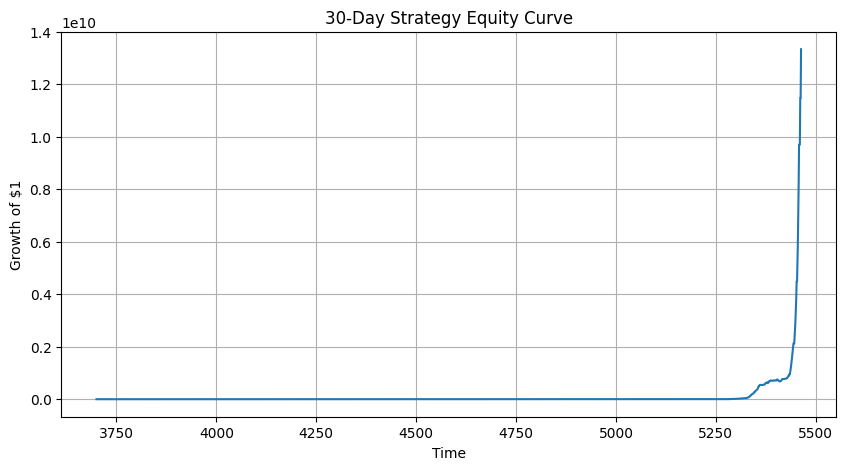

In [ ]:
test_30D["Cumulative"] = (1 + test_30D["Strategy_Return"]).cumprod()

plt.figure(figsize=(10,5))
plt.plot(test_30D["Cumulative"])
plt.title("30-Day Strategy Equity Curve")
plt.xlabel("Time")
plt.ylabel("Growth of $1")
plt.grid(True)
plt.show()

Sharpe (Non-Overlapping 30D): 1.2203745835566644
Total Trades: 57


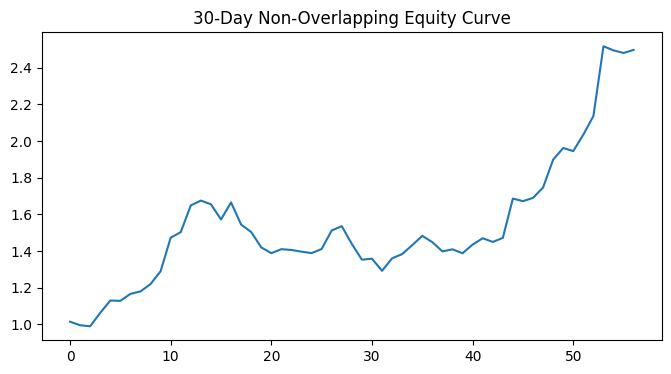

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

holding_period = 30
strategy_returns = []

i = 0
while i < len(test_30D) - holding_period:

    signal = test_30D["Signal"].iloc[i]

    if signal != 0:
        future_return = test_30D["Gold_30D"].iloc[i]
        strategy_returns.append(signal * future_return)
        i += holding_period   # jump forward 30 days
    else:
        i += 1   # move one day forward if no trade

strategy_returns = np.array(strategy_returns)

# Calculate Sharpe (monthly frequency ≈ 12 trades per year)
sharpe = (strategy_returns.mean() / strategy_returns.std()) * np.sqrt(12)

print("Sharpe (Non-Overlapping 30D):", sharpe)
print("Total Trades:", len(strategy_returns))

# Equity curve
equity = (1 + strategy_returns).cumprod()

plt.figure(figsize=(8,4))
plt.plot(equity)
plt.title("30-Day Non-Overlapping Equity Curve")
plt.show()

In [ ]:
# Create 6-month forward return
df["Gold_6M"] = df["Gold_Futures"].shift(-126) / df["Gold_Futures"] - 1

# Clean missing values
import numpy as np
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

print("Dataset shape after creating 6M target:", df.shape)

Dataset shape after creating 6M target: (4846, 40)


In [ ]:
# -----------------------
# Train-Test Split (Time-Based)
# -----------------------

# Convert Date to datetime (important if not already done)
df["Date"] = pd.to_datetime(df["Date"])

# Sort by date (safety step)
df = df.sort_values("Date")

# Split before and after 2019
train = df[df["Date"] < "2019-01-01"].copy()
test = df[df["Date"] >= "2019-01-01"].copy()

# Print shapes
print("Train shape:", train.shape)
print("Test shape:", test.shape)

# Optional: Check date range
print("Train date range:", train["Date"].min(), "to", train["Date"].max())
print("Test date range:", test["Date"].min(), "to", test["Date"].max())

Train shape: (3213, 40)
Test shape: (1633, 40)
Train date range: 2006-10-19 00:00:00 to 2018-12-31 00:00:00
Test date range: 2019-01-01 00:00:00 to 2025-03-12 00:00:00


/tmp/ipython-input-3832859356.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"])


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import numpy as np

# Use same feature list as before
features = [
    "DXY_ret",
    "SP500_ret",
    "Oil_ret",
    "Copper_ret",
    "VIX_change",
    "Yield_Spread",
    "Real_Yield_change",
    "Gold_ret_1",
    "Gold_ret_3",
    "Gold_ret_5",
    "DXY_ret_3",
    "SP500_ret_3",
    "Gold_momentum_20"
]

# Prepare data
X_train = train[features]
y_train = train["Gold_6M"]

X_test = test[features]
y_test = test["Gold_6M"]

# Train model
model_6M = XGBRegressor(
    n_estimators=400,
    max_depth=3,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model_6M.fit(X_train, y_train)

pred_6M = model_6M.predict(X_test)

print("R2 Score (6M):", r2_score(y_test, pred_6M))

R2 Score (6M): 0.030108767243146373


Sharpe (6M Non-Overlapping): 1.2709050677625215
Total Trades: 12


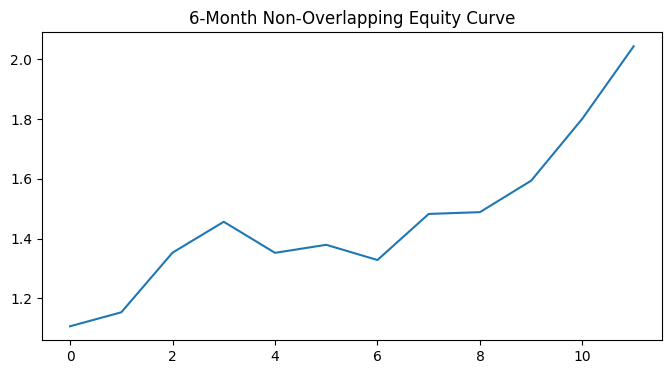

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

test_6M = test.copy()
test_6M["Prediction"] = pred_6M

# Larger threshold for long horizon
threshold = 0.05   # 5% expected move

test_6M["Signal"] = 0
test_6M.loc[test_6M["Prediction"] > threshold, "Signal"] = 1
test_6M.loc[test_6M["Prediction"] < -threshold, "Signal"] = -1

holding_period = 126
strategy_returns = []

i = 0
while i < len(test_6M) - holding_period:

    signal = test_6M["Signal"].iloc[i]

    if signal != 0:
        future_return = test_6M["Gold_6M"].iloc[i]
        strategy_returns.append(signal * future_return)
        i += holding_period
    else:
        i += 1

strategy_returns = np.array(strategy_returns)

if len(strategy_returns) > 1:
    sharpe_6M = (strategy_returns.mean() / strategy_returns.std()) * np.sqrt(2)
else:
    sharpe_6M = 0

print("Sharpe (6M Non-Overlapping):", sharpe_6M)
print("Total Trades:", len(strategy_returns))

# Equity curve
equity = (1 + strategy_returns).cumprod()

plt.figure(figsize=(8,4))
plt.plot(equity)
plt.title("6-Month Non-Overlapping Equity Curve")
plt.show()

In [ ]:
# Create Silver 1-Day forward return
df["Silver_1D"] = df["Silver_Futures"].shift(-1) / df["Silver_Futures"] - 1

import numpy as np
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

print("Dataset shape after creating Silver 1D:", df.shape)

Dataset shape after creating Silver 1D: (4845, 40)


In [ ]:
# -----------------------
# Train-Test Split (Time-Based)
# -----------------------

import pandas as pd

# Make sure Date is datetime
df["Date"] = pd.to_datetime(df["Date"])

# Sort by date (important for time series)
df = df.sort_values("Date")

# Time-based split (no leakage)
train = df[df["Date"] < "2019-01-01"].copy()
test = df[df["Date"] >= "2019-01-01"].copy()

# Print dataset shapes
print("Train shape:", train.shape)
print("Test shape:", test.shape)

# Print date ranges for verification
print("Train date range:", train["Date"].min(), "to", train["Date"].max())
print("Test date range:", test["Date"].min(), "to", test["Date"].max())

Train shape: (3213, 40)
Test shape: (1632, 40)
Train date range: 2006-10-19 00:00:00 to 2018-12-31 00:00:00
Test date range: 2019-01-01 00:00:00 to 2025-03-11 00:00:00


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

features = [
    "DXY_ret",
    "SP500_ret",
    "Oil_ret",
    "Copper_ret",
    "VIX_change",
    "Yield_Spread",
    "Real_Yield_change",
    "Gold_ret_1",
    "Gold_ret_3",
    "Gold_ret_5",
    "DXY_ret_3",
    "SP500_ret_3",
    "Gold_momentum_20"
]

X_train = train[features]
y_train = train["Silver_1D"]

X_test = test[features]
y_test = test["Silver_1D"]

model_silver_1D = XGBRegressor(
    n_estimators=400,
    max_depth=3,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model_silver_1D.fit(X_train, y_train)

pred_silver_1D = model_silver_1D.predict(X_test)

print("R2 Score (Silver 1D):", r2_score(y_test, pred_silver_1D))
print("RMSE (Silver 1D):", np.sqrt(mean_squared_error(y_test, pred_silver_1D)))

R2 Score (Silver 1D): -0.030299473218403872
RMSE (Silver 1D): 0.019880176794028506


In [ ]:
test_silver = test.copy()
test_silver["Prediction"] = pred_silver_1D

threshold = 0.001

test_silver["Signal"] = 0
test_silver.loc[test_silver["Prediction"] > threshold, "Signal"] = 1
test_silver.loc[test_silver["Prediction"] < -threshold, "Signal"] = -1

test_silver["Strategy_Return"] = test_silver["Signal"] * test_silver["Silver_1D"]

sharpe_silver_1D = (
    test_silver["Strategy_Return"].mean() /
    test_silver["Strategy_Return"].std()
) * np.sqrt(252)

print("Sharpe (Silver 1D):", sharpe_silver_1D)
print("Total Trades:", (test_silver["Signal"] != 0).sum())

Sharpe (Silver 1D): 0.7123166294368557
Total Trades: 1088


In [ ]:
# Create Silver 30-Day forward return
df["Silver_30D"] = df["Silver_Futures"].shift(-30) / df["Silver_Futures"] - 1

import numpy as np
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

print("Dataset shape after creating Silver 30D:", df.shape)

Dataset shape after creating Silver 30D: (4815, 40)


In [ ]:
import pandas as pd

df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

train = df[df["Date"] < "2019-01-01"].copy()
test = df[df["Date"] >= "2019-01-01"].copy()

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (3213, 40)
Test shape: (1602, 40)


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

features = [
    "DXY_ret",
    "SP500_ret",
    "Oil_ret",
    "Copper_ret",
    "VIX_change",
    "Yield_Spread",
    "Real_Yield_change",
    "Gold_ret_1",
    "Gold_ret_3",
    "Gold_ret_5",
    "DXY_ret_3",
    "SP500_ret_3",
    "Gold_momentum_20"
]

X_train = train[features]
y_train = train["Silver_30D"]

X_test = test[features]
y_test = test["Silver_30D"]

model_silver_30D = XGBRegressor(
    n_estimators=400,
    max_depth=3,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model_silver_30D.fit(X_train, y_train)

pred_silver_30D = model_silver_30D.predict(X_test)

print("R2 Score (Silver 30D):", r2_score(y_test, pred_silver_30D))

R2 Score (Silver 30D): -0.012983337193731126


Sharpe (Silver 30D Non-Overlapping): 0.7077097454838629
Total Trades: 43


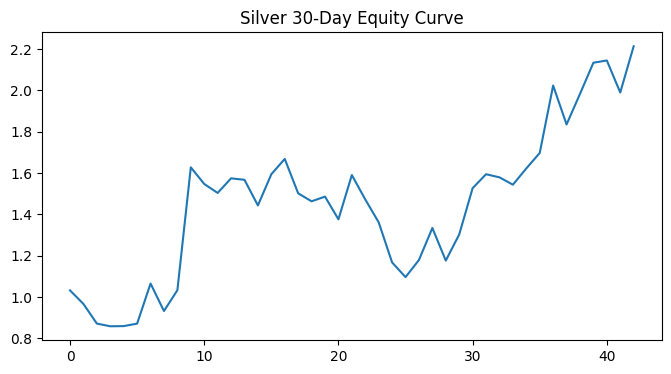

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

test_30D_silver = test.copy()
test_30D_silver["Prediction"] = pred_silver_30D

threshold = 0.02  # 2% for 30-day

test_30D_silver["Signal"] = 0
test_30D_silver.loc[test_30D_silver["Prediction"] > threshold, "Signal"] = 1
test_30D_silver.loc[test_30D_silver["Prediction"] < -threshold, "Signal"] = -1

holding_period = 30
strategy_returns = []

i = 0
while i < len(test_30D_silver) - holding_period:

    signal = test_30D_silver["Signal"].iloc[i]

    if signal != 0:
        future_return = test_30D_silver["Silver_30D"].iloc[i]
        strategy_returns.append(signal * future_return)
        i += holding_period
    else:
        i += 1

strategy_returns = np.array(strategy_returns)

if len(strategy_returns) > 1:
    sharpe_silver_30D = (strategy_returns.mean() / strategy_returns.std()) * np.sqrt(12)
else:
    sharpe_silver_30D = 0

print("Sharpe (Silver 30D Non-Overlapping):", sharpe_silver_30D)
print("Total Trades:", len(strategy_returns))

equity = (1 + strategy_returns).cumprod()

plt.figure(figsize=(8,4))
plt.plot(equity)
plt.title("Silver 30-Day Equity Curve")
plt.show()

In [ ]:
# Make sure Silver is numeric
df["Silver_Futures"] = pd.to_numeric(df["Silver_Futures"], errors="coerce")

# 6 month forward return (126 trading days)
df["Silver_6M"] = df["Silver_Futures"].shift(-126) / df["Silver_Futures"] - 1

In [ ]:
print("Silver_6M non-null:", df["Silver_6M"].notna().sum())

Silver_6M non-null: 4563


In [ ]:
features = [
    "DXY_ret",
    "SP500_ret",
    "Oil_ret",
    "Copper_ret",
    "VIX_change",
    "Gold_ret_1",
    "Gold_ret_3",
    "Gold_ret_5",
    "DXY_ret_3",
    "SP500_ret_3",
    "Gold_momentum_20"
]

In [ ]:
required_cols = features + ["Silver_6M"]

df_clean = df.dropna(subset=required_cols)

print("Clean dataset shape:", df_clean.shape)

Clean dataset shape: (4563, 40)


In [ ]:
split = int(len(df_clean) * 0.7)

train = df_clean.iloc[:split]
test = df_clean.iloc[split:]

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (3194, 40)
Test shape: (1369, 40)


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X_train = train[features]
y_train = train["Silver_6M"]

X_test = test[features]
y_test = test["Silver_6M"]

model = XGBRegressor(
    n_estimators=200,
    max_depth=2,
    learning_rate=0.03,
    subsample=0.7,
    colsample_bytree=0.7,
    random_state=42
)

model.fit(X_train, y_train)

pred = model.predict(X_test)

print("R2:", r2_score(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))

R2: 0.018526643778185248
RMSE: 0.199935732474058


In [ ]:
test_copy = test.copy()
test_copy["Prediction"] = pred

threshold = 0.1

test_copy["Signal"] = 0
test_copy.loc[test_copy["Prediction"] > threshold, "Signal"] = 1
test_copy.loc[test_copy["Prediction"] < -threshold, "Signal"] = -1

test_copy["Strategy_Return"] = test_copy["Signal"] * test_copy["Silver_6M"]

sharpe = (
    test_copy["Strategy_Return"].mean() /
    test_copy["Strategy_Return"].std()
) * np.sqrt(2)

print("Sharpe (Silver 6M):", sharpe)

Sharpe (Silver 6M): 0.24836681134850072


In [ ]:
df["Silver_MA100"] = df["Silver_Futures"].rolling(100).mean()

df["Trend"] = 0
df.loc[df["Silver_Futures"] > df["Silver_MA100"], "Trend"] = 1
df.loc[df["Silver_Futures"] < df["Silver_MA100"], "Trend"] = -1

Sharpe (Silver 6M with Trend Filter): 0.5260192481931617
Total Trades (with Trend Filter): 7


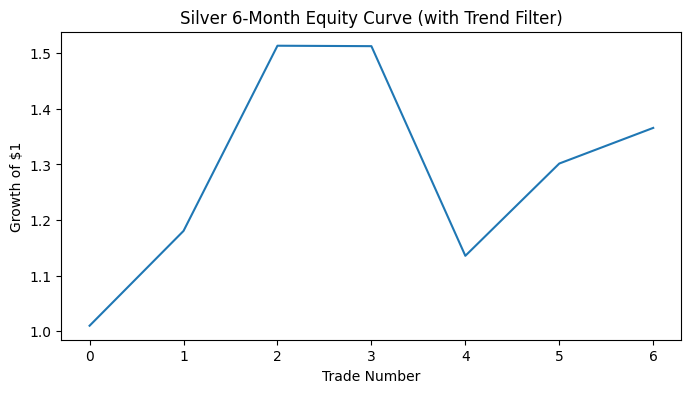

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming test_copy DataFrame and 'pred' (predictions) are already defined from previous steps
# and that 'test_copy' contains the 'Trend' column.

test_copy["Prediction"] = pred

threshold = 0.1

test_copy["Signal"] = 0
test_copy.loc[test_copy["Prediction"] > threshold, "Signal"] = 1
test_copy.loc[test_copy["Prediction"] < -threshold, "Signal"] = -1

holding_period = 126 # 6 months
strategy_returns_filtered = []

i = 0
while i < len(test_copy) - holding_period:

    signal = test_copy["Signal"].iloc[i]
    current_trend = test_copy["Trend"].iloc[i]

    # Only trade if the signal aligns with the overall trend
    if signal != 0 and signal == current_trend:
        future_return = test_copy["Silver_6M"].iloc[i]
        strategy_returns_filtered.append(signal * future_return)
        i += holding_period # Jump forward by the holding period
    else:
        i += 1 # Move one day forward if no trade or trend doesn't align

strategy_returns_filtered = np.array(strategy_returns_filtered)

if len(strategy_returns_filtered) > 1:
    sharpe_filtered = (strategy_returns_filtered.mean() / strategy_returns_filtered.std()) * np.sqrt(2)
else:
    sharpe_filtered = 0 # Not enough trades for Sharpe calculation

print("Sharpe (Silver 6M with Trend Filter):", sharpe_filtered)
print("Total Trades (with Trend Filter):", len(strategy_returns_filtered))

# Equity curve
if len(strategy_returns_filtered) > 0:
    equity_filtered = (1 + strategy_returns_filtered).cumprod()

    plt.figure(figsize=(8,4))
    plt.plot(equity_filtered)
    plt.title("Silver 6-Month Equity Curve (with Trend Filter)")
    plt.xlabel("Trade Number")
    plt.ylabel("Growth of $1")
    plt.show()
else:
    print("No trades were executed with the trend filter.")


In [ ]:
print("Gold columns:")
print(test.columns)

print("\nSilver columns:")
print(test_silver.columns)

Gold columns:
Index(['Date', 'Gold_Futures', 'Silver_Futures', 'DXY', 'EURUSD', 'USDJPY',
       'SP500', 'VIX', 'Copper', 'Oil', 'VIX3M', 'US_Real_Yield_10Y',
       'US_10Y_Yield', 'US_2Y_Yield', 'US_Breakeven_10Y', 'US_Breakeven_5Y',
       'US_CPI', 'US_M2', 'US_Industrial_Production', 'Gold_1D', 'Gold_30D',
       'Gold_6M', 'Silver_1D', 'Silver_30D', 'Silver_6M', 'DXY_ret',
       'SP500_ret', 'Oil_ret', 'Copper_ret', 'VIX_change', 'Yield_Spread',
       'Real_Yield_change', 'Gold_ret_1', 'Gold_ret_3', 'Gold_ret_5',
       'DXY_ret_3', 'SP500_ret_3', 'Gold_momentum_20', 'Gold_MA50', 'Trend'],
      dtype='object')

Silver columns:
Index(['Date', 'Gold_Futures', 'Silver_Futures', 'DXY', 'EURUSD', 'USDJPY',
       'SP500', 'VIX', 'Copper', 'Oil', 'VIX3M', 'US_Real_Yield_10Y',
       'US_10Y_Yield', 'US_2Y_Yield', 'US_Breakeven_10Y', 'US_Breakeven_5Y',
       'US_CPI', 'US_M2', 'US_Industrial_Production', 'Gold_1D', 'Gold_30D',
       'Gold_6M', 'Silver_1D', 'Silver_30D', 'Silver_6M

In [ ]:
test_gold = test.copy()

test_gold["Prediction"] = pred   # make sure this is gold prediction

threshold = 0

In [ ]:
split = int(len(df_clean) * 0.7)

train = df_clean.iloc[:split]
test = df_clean.iloc[split:]

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (3194, 40)
Test shape: (1369, 40)


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X_train = train[features]
y_train = train["Silver_6M"]

X_test = test[features]
y_test = test["Silver_6M"]

model = XGBRegressor(
    n_estimators=200,
    max_depth=2,
    learning_rate=0.03,
    subsample=0.7,
    colsample_bytree=0.7,
    random_state=42
)

model.fit(X_train, y_train)

pred = model.predict(X_test)

print("R2:", r2_score(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))

R2: 0.018526643778185248
RMSE: 0.199935732474058


In [ ]:
test_copy = test.copy()
test_copy["Prediction"] = pred

threshold = 0.1

test_copy["Signal"] = 0
test_copy.loc[test_copy["Prediction"] > threshold, "Signal"] = 1
test_copy.loc[test_copy["Prediction"] < -threshold, "Signal"] = -1

test_copy["Strategy_Return"] = test_copy["Signal"] * test_copy["Silver_6M"]

sharpe = (
    test_copy["Strategy_Return"].mean() /
    test_copy["Strategy_Return"].std()
) * np.sqrt(2)

print("Sharpe (Silver 6M):", sharpe)

Sharpe (Silver 6M): 0.24836681134850072


In [ ]:
features_1d = [
    "DXY_ret",
    "SP500_ret",
    "Oil_ret",
    "Copper_ret",
    "VIX_change",
    "Yield_Spread",
    "Real_Yield_change",
    "Gold_ret_1",
    "Gold_ret_3",
    "Gold_ret_5",
    "DXY_ret_3",
    "SP500_ret_3",
    "Gold_momentum_20"
]

print("Defined 1-day features list.")

Defined 1-day features list.


**Reasoning**:
Following instruction 2, I will split the main DataFrame `df` into `train_gold_1d` and `test_gold_1d` based on the date '2019-01-01' to prepare for the Gold 1-day model training.



In [ ]:
import pandas as pd

# Ensure 'Date' column is datetime type for proper splitting
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date").copy()

train_gold_1d = df[df["Date"] < "2019-01-01"].copy()
test_gold_1d = df[df["Date"] >= "2019-01-01"].copy()

print("Train Gold 1D shape:", train_gold_1d.shape)
print("Test Gold 1D shape:", test_gold_1d.shape)

Train Gold 1D shape: (3213, 41)
Test Gold 1D shape: (1476, 41)


**Reasoning**:
Now that the `train_gold_1d` and `test_gold_1d` DataFrames are prepared, I will select the features for `X_train_gold_1d` and `X_test_gold_1d` and the target variable 'Gold_1D' for `y_train_gold_1d` and `y_test_gold_1d`, as specified in instruction #3.



In [ ]:
X_train_gold_1d = train_gold_1d[features_1d]
y_train_gold_1d = train_gold_1d["Gold_1D"]

X_test_gold_1d = test_gold_1d[features_1d]
y_test_gold_1d = test_gold_1d["Gold_1D"]

print("Gold 1D training data prepared.")

Gold 1D training data prepared.


**Reasoning**:
As per instruction #4, I will initialize an `XGBRegressor` model with the specified parameters and then fit it to the `X_train_gold_1d` and `y_train_gold_1d` data.



In [ ]:
from xgboost import XGBRegressor

model_gold_1d = XGBRegressor(
    n_estimators=400,
    max_depth=3,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model_gold_1d.fit(X_train_gold_1d, y_train_gold_1d)

print("XGBoost model for Gold 1D returns trained.")

XGBoost model for Gold 1D returns trained.


**Reasoning**:
As per instruction #5, I will generate predictions for Gold 1-day returns on the test set (`X_test_gold_1d`) using the trained `model_gold_1d` and store them in `pred_gold_1d`.



In [ ]:
pred_gold_1d = model_gold_1d.predict(X_test_gold_1d)

print("Predictions for Gold 1D returns generated.")

Predictions for Gold 1D returns generated.


**Reasoning**:
As per instruction #6, I will create a new DataFrame `gold_1d_strategy_df` by copying `test_gold_1d` and then add the generated `pred_gold_1d` values as a 'Prediction' column to it.



In [ ]:
gold_1d_strategy_df = test_gold_1d.copy()
gold_1d_strategy_df["Prediction"] = pred_gold_1d

print("gold_1d_strategy_df created with predictions.")

gold_1d_strategy_df created with predictions.


In [ ]:
threshold_gold = 0.001

gold_1d_strategy_df["Signal"] = 0
gold_1d_strategy_df.loc[gold_1d_strategy_df["Prediction"] > threshold_gold, "Signal"] = 1
gold_1d_strategy_df.loc[gold_1d_strategy_df["Prediction"] < -threshold_gold, "Signal"] = -1

print("Trading signals for Gold 1D strategy generated.")

Trading signals for Gold 1D strategy generated.


**Reasoning**:
As per instruction #8, I will calculate the 'Strategy_Return' for the Gold 1-day strategy by multiplying the 'Signal' column with the 'Gold_1D' column in `gold_1d_strategy_df`.



In [ ]:
gold_1d_strategy_df["Strategy_Return"] = gold_1d_strategy_df["Signal"] * gold_1d_strategy_df["Gold_1D"]

print("Strategy returns for Gold 1D calculated.")

Strategy returns for Gold 1D calculated.


**Reasoning**:
As per instruction #9, I will select the 'Date' and 'Strategy_Return' columns from `gold_1d_strategy_df` and rename the 'Strategy_Return' column to 'Gold_1D_Strategy_Return' to prepare it for merging.



In [ ]:
gold_1d_strategy_returns_df = gold_1d_strategy_df[["Date", "Strategy_Return"]].copy()
gold_1d_strategy_returns_df.rename(columns={"Strategy_Return": "Gold_1D_Strategy_Return"}, inplace=True)

print("Gold 1D strategy returns DataFrame prepared for merging.")

Gold 1D strategy returns DataFrame prepared for merging.


**Reasoning**:
As per instruction #10, I will select the 'Date' and 'Strategy_Return' columns from the existing `test_silver` DataFrame and rename the 'Strategy_Return' column to 'Silver_1D_Strategy_Return'.



In [ ]:
silver_1d_strategy_returns_df = test_silver[["Date", "Strategy_Return"]].copy()
silver_1d_strategy_returns_df.rename(columns={"Strategy_Return": "Silver_1D_Strategy_Return"}, inplace=True)

print("Silver 1D strategy returns DataFrame prepared for merging.")

Silver 1D strategy returns DataFrame prepared for merging.


**Reasoning**:
As per instruction #11, I will merge the `gold_1d_strategy_returns_df` and `silver_1d_strategy_returns_df` DataFrames using an outer merge on the 'Date' column to create `combined_1d_strategies`.



In [ ]:
combined_1d_strategies = pd.merge(gold_1d_strategy_returns_df, silver_1d_strategy_returns_df, on="Date", how="outer")

print("Combined 1D strategies DataFrame created.")
print(combined_1d_strategies.head())

Combined 1D strategies DataFrame created.
        Date  Gold_1D_Strategy_Return  Silver_1D_Strategy_Return
0 2019-01-01                 0.002112                   0.007063
1 2019-01-02                 0.000000                   0.010552
2 2019-01-03                -0.007045                  -0.000700
3 2019-01-04                -0.003196                   0.001657
4 2019-01-07                -0.002798                  -0.000000


In [ ]:
combined_1d_strategies["Gold_1D_Strategy_Return"] = combined_1d_strategies["Gold_1D_Strategy_Return"].fillna(0)
combined_1d_strategies["Silver_1D_Strategy_Return"] = combined_1d_strategies["Silver_1D_Strategy_Return"].fillna(0)

print("NaN values in strategy return columns filled with 0.")

NaN values in strategy return columns filled with 0.


In [ ]:
combined_1d_strategies["Combined_1D_Strategy_Return"] = (combined_1d_strategies["Gold_1D_Strategy_Return"] + combined_1d_strategies["Silver_1D_Strategy_Return"]) / 2

print("Combined 1D strategy return calculated.")

Combined 1D strategy return calculated.


**Reasoning**:
As per instruction #3, I will display the head of the `combined_1d_strategies` DataFrame to verify the new 'Combined_1D_Strategy_Return' column and its values.



In [ ]:
print(combined_1d_strategies.head())

        Date  Gold_1D_Strategy_Return  Silver_1D_Strategy_Return  \
0 2019-01-01                 0.002112                   0.007063   
1 2019-01-02                 0.000000                   0.010552   
2 2019-01-03                -0.007045                  -0.000700   
3 2019-01-04                -0.003196                   0.001657   
4 2019-01-07                -0.002798                  -0.000000   

   Combined_1D_Strategy_Return  
0                     0.004587  
1                     0.005276  
2                    -0.003872  
3                    -0.000770  
4                    -0.001399  


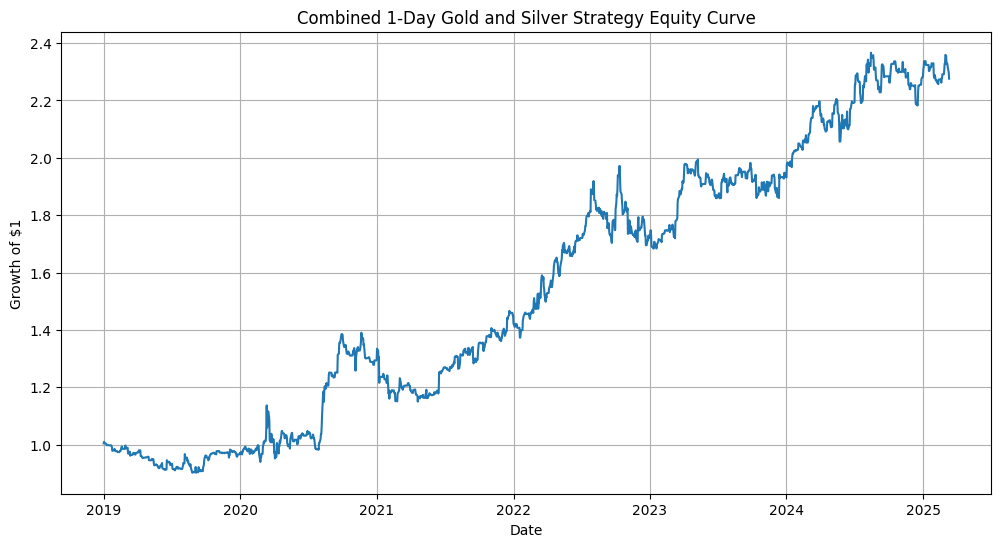

In [ ]:
import matplotlib.pyplot as plt

# Calculate cumulative returns (Instruction 2)
combined_1d_strategies["Cumulative_Combined_Return"] = (1 + combined_1d_strategies["Combined_1D_Strategy_Return"]).cumprod()

# Create figure and axes (Instruction 3)
plt.figure(figsize=(12, 6))

# Plot the cumulative returns (Instruction 4)
plt.plot(combined_1d_strategies["Date"], combined_1d_strategies["Cumulative_Combined_Return"])

# Add title (Instruction 5)
plt.title("Combined 1-Day Gold and Silver Strategy Equity Curve")

# Label axes (Instruction 6)
plt.xlabel("Date")
plt.ylabel("Growth of $1")

# Add grid (Instruction 7)
plt.grid(True)

# Display the plot (Instruction 8)
plt.show()